### Q1. What is Bayes' theorem?

Bayes’ Theorem is used to determine the conditional probability of an event. 

Bayes, theorem as the name suggest is a mathematical theorem which is used to find the conditionality probability of an event. Conditional probability is the probability of the event which will occur in future. It is calculated based on the previous outcomes of the events.

Bayes' theorem is a fundamental principle in probability theory and statistics that describes how to update the probability of a hypothesis based on new evidence. 


### Q2. What is the formula for Bayes' theorem?

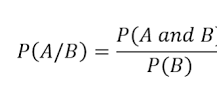

Where P(A) and P(B) are the probabilities of events A and B.
P(A|B) is the probability of event A given B
P(B|A) is the probability of event B given 

Bayes theorem is used to find the reverse probabilities if we know the conditional probability of an event.
A.

### Q3. How is Bayes' theorem used in practice?

Medical Diagnosis:
Scenario: Determining the probability of a patient having a disease given a positive test result.

Spam Filtering:
Scenario: Determining the probability that an email is spam based on the presence of certain words.

classifing the text document
Scenario: Classifying text documents into categories (e.g., spam or not spam, sentiment analysis).

### Q4. What is the relationship between Bayes' theorem and conditional probability?

Bayes' theorem and conditional probability are closely related concepts in probability theory. Bayes' theorem is essentially a formula that describes how to update the probability of a hypothesis given new evidence, and it is derived directly from the definition of conditional probability.

Conditional Probability
Conditional probability is the probability of an event occurring given that another event has already occurred. It is denoted as 
𝑃(A∣B)
P(A∣B), which reads "the probability of A given 𝐵". The formula for conditional probability is: P(A∣B) = P(A intersection B)/P(B)

Conditional Probability: Represents the probability of an event occurring given that another event has occurred.
Bayes' Theorem: Provides a way to update the probability of a hypothesis given new evidence, using conditional probabilities.

### Q5. How do you choose which type of Naive Bayes classifier to use for any given problem?

Choosing the appropriate type of Naive Bayes classifier for a given problem depends on the nature of the data you are working with. There are three main types of Naive Bayes classifiers, each suited to different types of data: Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes. 

### Gaussian Naïve Bayes

In gaussian naïve bayes the continuous values associated with each feature is assumed to follow gaussian distribution. A random variable is said to follow a gaussian/normal distribution when plotted gives a bell shaped curve which is symmetric about the mean.

### Multinomial Naïve Bayes

Multinomial naïve bayes is mostly used in document classification problem like email spam classification, sentiment analysis etc. Multinomial naïve bayes is a variant mainly used for handling discrete data i.e., mainly like text classification problem where the features are word counts or term frequencies
### Bernoulli Naïve Bayes
Bernoulli naïve bayes works very similar to multinomial naïve bayes except the difference that the predictor variables are independent Boolean variable like if a particular word is present in a document or not represented by either 1 or 0. This model is often used for document classification task.

#### we can also decide based on the nature of data and Domain Knowledge ####

##### 

Nature of the Data:
    
    Continuous Data: If your features are continuous and normally distributed, use Gaussian Naive Baye  
    Count Data: If your features are counts or frequencies, such as word counts in text classification, use Multinomial Naive Baye  
    Binary Data: If your features are binary, indicating presence or absence, use Bernoulli Naive Bayes
##### 

Domain Knowledg
       Understanding the domain and the nature of the data can guide the choice. For example, in text classification, knowing whether to use word count
    s or binary indicators can determine the choice between Multinomial and Bernoulli Nae B Bas  .

### Q6. Assignment:
##### You have a dataset with two features, X1 and X2, and two possible classes, A and B. You want to use Naive Bayes to classify a new instance with features X1 = 3 and X2 = 4. The following table shows the frequency of each feature value for each class:
    
    Class	 X1=1 X1=2 	X1=3 	X2=1 	X2=2 	X2=3	 X2=4
    
     A	 3	 3	 4	 4	 3	 3	 3
    
     B	 2	 2	 1	 2	 2	 2	 3

##### Assuming equal prior probabilities for each class, which class would Naive Bayes predict the new instance to belong to?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [14]:
## here x1 = 0 and x2 = 1 class

data_dict = {
    "A" : [3,3,4,4,3,3,3],
    "B" : [2,2,1,2,2,2,3],
    "Class" : [0,0,0,1,1,1,1]
}
data = pd.DataFrame(data_dict)
data

,A,B,Class
0,3,2,0
1,3,2,0
2,4,1,0
3,4,2,1
4,3,2,1
5,3,2,1
6,3,3,1


In [3]:
## new_data_point = 3,2 

In [6]:
test = np.array([3,2])
test

array([3, 2])

In [94]:
def prior_probability(y):
    class_,count = np.unique(y,return_counts=True)
    prior_prob = []
    for i in class_:
        prob = count[i]/len(y)
        prior_prob.append(prob)
        
    # print("prior probability is :",prior_prob)
    
    return class_, prior_prob

def conditional_probability(test_data, data):
    # print("the length of test data is :",len(test_data))
    postitor_probability = []
    
    for i in range(len(test_data)):
        # print("iteration number is :",i)
        val =  test_data[i] 
        tem_data = data[data[:,i] == val]
        # print(tem_data)
        total = sum(data[:,i] == val)
        
        class_, count = np.unique(tem_data[:,-1],return_counts=True)
        # print(class_,count)
        
        for i in range(len(class_)):
            postitor_probability.append(count[i]/total)
            
    return postitor_probability

def naive_bayes(data,test_data):
    x = data[:,:-1]
    y = data[:,-1]
    # print(x,y)
    classes, prior_probability_class = prior_probability(y)
    # print("classes are :",classes)
    # print("prior probabilities : ",prior_probability_class)
    
    predicted_probability = []
    
    # p_prob = prior_probability_class[i]
    post_probability = conditional_probability(test_data,data)
    # print(post_probability)

    for i in range(len(classes)):
        # print(post_probability[i])
        # print(post_probability[i+len(classes)])
        prob = post_probability[i]* post_probability[i]*post_probability[i+len(classes)]
        predicted_probability.append(prob)
    
    # print(predicted_probability)

    max = np.argmax(predicted_probability)
    # print(max)
    predicted_class = classes[max]
    return predicted_class

In [95]:
naive_bayes(data.values,test)

1